# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Loading the Dataset

In [2]:
df=pd.read_excel('matchstats.xlsx')

# EDA

In [3]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,FTR
0,E0,19/08/00,Charlton,Man City,4,0,2,0,H,Rob Harris,...,4,13,12,6,6,1,2,0,0,0
1,E0,19/08/00,Chelsea,West Ham,4,2,1,0,H,Graham Barber,...,5,19,14,7,7,1,2,0,0,0
2,E0,19/08/00,Coventry,Middlesbrough,1,3,1,1,D,Barry Knight,...,9,15,21,8,4,5,3,1,0,1
3,E0,19/08/00,Derby,Southampton,2,2,1,2,A,Andy D'Urso,...,6,11,13,5,8,1,1,0,0,2
4,E0,19/08/00,Leeds,Everton,2,0,2,0,H,Dermot Gallagher,...,6,21,20,6,4,1,3,0,0,0


In [4]:
df.shape

(7220, 23)

In [5]:
df.describe

<bound method NDFrame.describe of      Div                 Date     HomeTeam       AwayTeam  FTHG  FTAG  HTHG  \
0     E0             19/08/00     Charlton       Man City     4     0     2   
1     E0             19/08/00      Chelsea       West Ham     4     2     1   
2     E0             19/08/00     Coventry  Middlesbrough     1     3     1   
3     E0             19/08/00        Derby    Southampton     2     2     1   
4     E0             19/08/00        Leeds        Everton     2     0     2   
...   ..                  ...          ...            ...   ...   ...   ...   
7215  E0  2019-12-05 00:00:00    Liverpool         Wolves     2     0     1   
7216  E0  2019-12-05 00:00:00   Man United        Cardiff     0     2     0   
7217  E0  2019-12-05 00:00:00  Southampton   Huddersfield     1     1     1   
7218  E0  2019-12-05 00:00:00    Tottenham        Everton     2     2     1   
7219  E0  2019-12-05 00:00:00      Watford       West Ham     1     4     0   

      HTAG HTR   

In [6]:
# droping uncessary
df=df.drop('Div',axis=1)

In [7]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,FTR
0,19/08/00,Charlton,Man City,4,0,2,0,H,Rob Harris,17,...,4,13,12,6,6,1,2,0,0,0
1,19/08/00,Chelsea,West Ham,4,2,1,0,H,Graham Barber,17,...,5,19,14,7,7,1,2,0,0,0
2,19/08/00,Coventry,Middlesbrough,1,3,1,1,D,Barry Knight,6,...,9,15,21,8,4,5,3,1,0,1
3,19/08/00,Derby,Southampton,2,2,1,2,A,Andy D'Urso,6,...,6,11,13,5,8,1,1,0,0,2
4,19/08/00,Leeds,Everton,2,0,2,0,H,Dermot Gallagher,17,...,6,21,20,6,4,1,3,0,0,0


## Encoding 

In [8]:

df.loc[df['HTR']=='H', 'HTR']=0
df.loc[df['HTR']=='A', 'HTR']=1
df.loc[df['HTR']=='D', 'HTR']=2

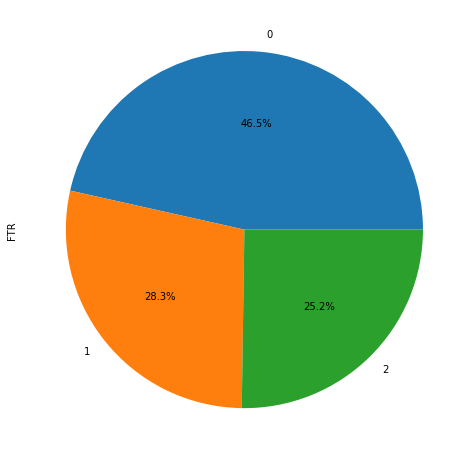

In [9]:
# Poloting pie chart for full time result
plt.figure(figsize=(8,14))
df['FTR'].value_counts('0').plot.pie(autopct='%1.1f%%')

### Data shows that about 46.5% of the teams who play home wins the match

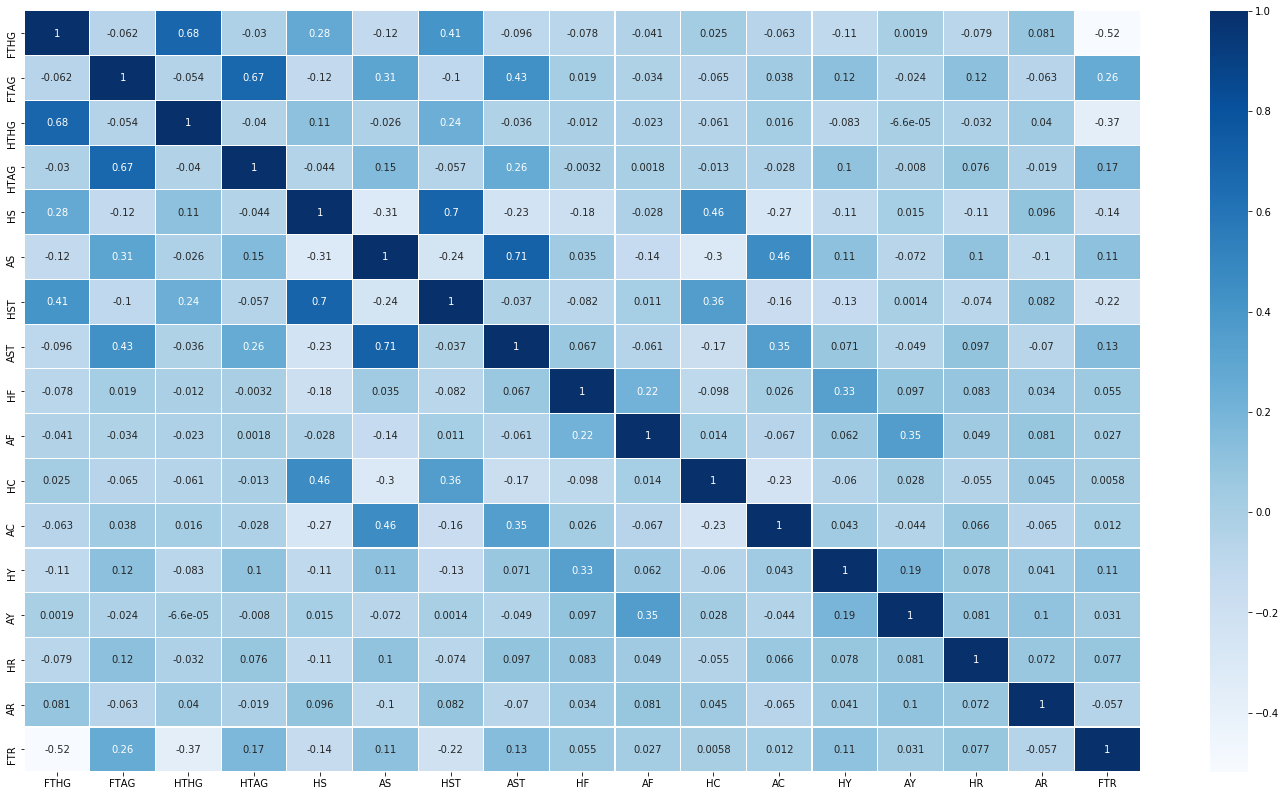

In [10]:
plt.figure(figsize=(25,14))
sns.heatmap(df.corr(),annot=True,cmap='Blues',linewidths=0.1) 
fig=plt.gcf()
plt.show()

In [11]:
corr_sale = df.corr().FTR
corr_field = corr_sale.sort_values(ascending = False).head(11)
corr_field

FTR     1.000000
FTAG    0.259147
HTAG    0.172144
AST     0.134305
AS      0.114722
HY      0.105004
HR      0.077463
HF      0.055073
AY      0.031239
AF      0.027042
AC      0.011556
Name: FTR, dtype: float64

Text(0, 0.5, 'Total Away Shots on Target')

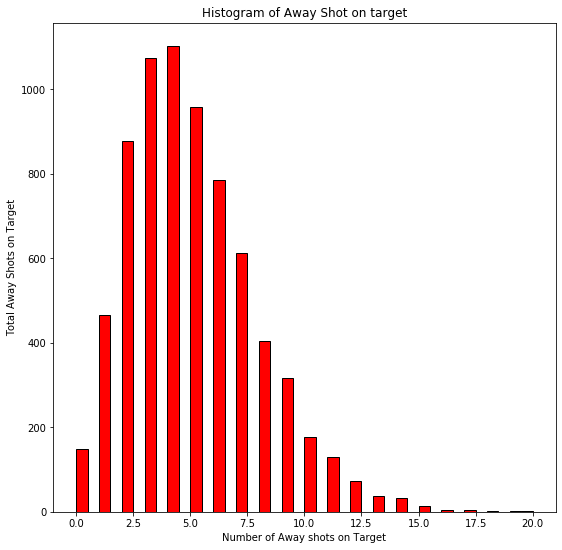

In [12]:
plt.figure(figsize=(9,9))
plt.hist(df['AST'], color = 'red', edgecolor='black', bins= int(200/5))

plt.title('Histogram of Away Shot on target')
plt.xlabel('Number of Away shots on Target')
plt.ylabel('Total Away Shots on Target')

Text(0, 0.5, 'Total Home Shots on Target')

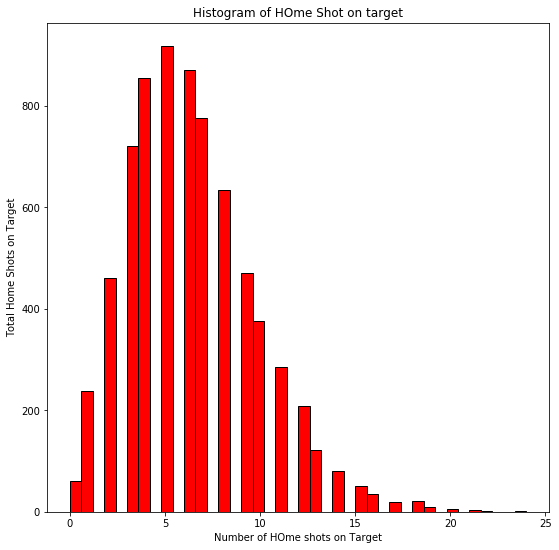

In [13]:
plt.figure(figsize=(9,9))
plt.hist(df['HST'], color = 'red', edgecolor='black', bins= int(200/5))

plt.title('Histogram of HOme Shot on target')
plt.xlabel('Number of HOme shots on Target')
plt.ylabel('Total Home Shots on Target')

In [14]:
#encodinng Data using get_dummies function

newX=pd.get_dummies(df)
newX.head()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,Referee_l Mason,Referee_ A D'Urso,Referee_ A Wiley,Referee_ C Foy,Referee_ D Gallagher,Referee_ H Webb,Referee_ M Atkinson,Referee_ N Barry,Referee_ S Dunn,Referee_ U Rennie
0,4,0,2,0,17,8,14,4,13,12,...,0,0,0,0,0,0,0,0,0,0
1,4,2,1,0,17,12,10,5,19,14,...,0,0,0,0,0,0,0,0,0,0
2,1,3,1,1,6,16,3,9,15,21,...,0,0,0,0,0,0,0,0,0,0
3,2,2,1,2,6,13,4,6,11,13,...,0,0,0,0,0,0,0,0,0,0
4,2,0,2,0,17,12,8,6,21,20,...,0,0,0,0,0,0,0,0,0,0


In [15]:
newX=newX.reset_index()

In [16]:
newX.fillna(0,inplace=True)

In [17]:
newX=newX.drop('FTHG', axis=1)
newX=newX.drop('FTAG', axis=1)

In [18]:
# FTR Feature represent the full time result so it is taken as target

Y =newX['FTR']
X =newX.loc[:,newX.columns!='FTR']

In [19]:
corr_sale = df.corr().FTR
corr_field= corr_sale.sort_values(ascending=False).head(11)
corr_field

FTR     1.000000
FTAG    0.259147
HTAG    0.172144
AST     0.134305
AS      0.114722
HY      0.105004
HR      0.077463
HF      0.055073
AY      0.031239
AF      0.027042
AC      0.011556
Name: FTR, dtype: float64

In [20]:
df_n=df

In [21]:
df_n=df_n.drop('Date', axis=1)
df_n=df_n.drop('HomeTeam', axis=1)
df_n=df_n.drop('AwayTeam', axis=1)
df_n=df_n.drop('Referee', axis=1)
df_n=df_n.drop('FTHG', axis=1)
df_n=df_n.drop('FTAG', axis=1)
df_n=df_n.drop('HTR', axis=1)

In [22]:

df_n

,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,FTR
0,2,0,17,8,14,4,13,12,6,6,1,2,0,0,0
1,1,0,17,12,10,5,19,14,7,7,1,2,0,0,0
2,1,1,6,16,3,9,15,21,8,4,5,3,1,0,1
3,1,2,6,13,4,6,11,13,5,8,1,1,0,0,2
4,2,0,17,12,8,6,21,20,6,4,1,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7215,1,0,13,7,5,2,3,11,4,1,0,2,0,0,0
7216,0,1,26,13,10,4,9,6,11,2,3,3,0,0,1
7217,1,0,10,10,3,3,8,6,4,3,0,1,0,0,2
7218,1,0,11,17,3,9,10,13,7,4,0,2,0,0,2


In [23]:
df_n
y =df_n['FTR']
x =df_n.loc[:,df_n.columns!='FTR']

In [24]:
df_n.shape

(7220, 15)

#### Train and Split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size= 0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5776, 2181)
(1444, 2181)
(5776,)
(1444,)


#### Scaling

In [26]:
from sklearn.preprocessing import RobustScaler

In [27]:
# splitting and Scaling Numerical features
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=5)

rc_x=RobustScaler()
x_train = rc_x.fit_transform(x_train)
x_test=rc_x.transform(x_test)

#### Algorithm
#### Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


In [29]:
## Loading all algorithms

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [30]:
from sklearn import metrics

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import metrics

### Best models Adaboost, KNN, SVM applying on newdataset

In [32]:
# Ada Boost

from sklearn.ensemble import AdaBoostClassifier
model8 = AdaBoostClassifier(n_estimators=300,learning_rate=0.1)
scoring = 'accuracy'
score = cross_val_score(model8, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.64878893 0.61764706 0.60899654 0.66782007 0.65224913 0.64186851
 0.60831889 0.66377816 0.64124783 0.63604853]


63.87

In [33]:
model8.fit(x_train, y_train)
prediction8 = model8.predict(x_test)
print("Accuracy:%.4f" %metrics.accuracy_score(y_test, prediction8))
print('F1 Score:%.4f '% f1_score(Y_test, prediction8, average='weighted'))

Accuracy:0.6489
F1 Score:0.6197 


In [34]:
import pickle

pickle.dump(model8, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [35]:
prediction=model.predict(x_test)


In [51]:
test=np.array([1,2,3,4,1,2,1,3,4,2,1,2,2,1])
test=np.expand_dims(test,axis=0)

In [52]:
model=pickle.load(open('model.pkl','rb'))

In [53]:
prediction=model.predict(test)

In [54]:
prediction

output='{0:.{1}f}'.format(prediction[0], 1)
type(output)

str

In [55]:
output=float(output)


In [64]:


if output<(0.5):
    print('Home team won')
elif output<(1.5):
    print('Away team won')
elif output<(2.5):
    print('Match Draw')

Home team won


In [65]:
test=np.array([1,1,11,12,6,7,12,19,6,3,1,3,0,0])
test=np.expand_dims(test,axis=0)

prediction=model.predict(test)
output='{0:.{1}f}'.format(prediction[0], 1)
output=float(output)


if output<(0.5):
    print('Home team won')
elif output<(1.5):
    print('Away team won')
elif output<(2.5):
    print('Match Draw')

Match Draw


In [77]:
test=np.array([1,1,12,10,11,7,12,19,6,3,0,0,0,0])
test=np.expand_dims(test,axis=0)

prediction=model.predict(test)
output='{0:.{1}f}'.format(prediction[0], 1)
output=float(output)


if output<(0.5):
    print('Home team won')
elif output<(1.5):
    print('Away team won')
elif output<(2.5):
    print('Match Draw')

Match Draw
